<a href="https://colab.research.google.com/github/irving91/bike-share-sim-nugget/blob/master/London_Bike_Share_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Data @ https://www.kaggle.com/edenau/london-bike-sharing-system-data

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import random

from scipy.stats import poisson 

In [ ]:
stations = pd.read_csv('stations.csv')
journeys = pd.read_csv('journeys.csv')

In [ ]:
stations.head()

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


In [ ]:
journeys.head()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36


In [ ]:
df = pd.merge(journeys, stations, left_on='Start Station ID', right_on = 'Station ID', how='left') 

In [ ]:
df

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Station ID,Capacity,Latitude,Longitude,Station Name
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251,251.0,34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street"
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550,550.0,23.0,51.521564,-0.039264,"Harford Street, Mile End"
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212,212.0,17.0,51.506584,-0.199004,"Campden Hill Road, Notting Hill"
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163,163.0,27.0,51.493184,-0.167894,"Sloane Avenue, Knightsbridge"
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36,36.0,28.0,51.501737,-0.184980,"De Vere Gardens, Kensington"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542839,270.0,5296,8,8,17,0,2,32,7,8,17,23,58,42,42.0,28.0,51.530991,-0.093903,"Wenlock Road , Hoxton"
1542840,911.0,12348,8,8,17,0,13,625,7,8,17,23,58,222,222.0,43.0,51.502757,-0.155349,"Knightsbridge, Hyde Park"
1542841,447.0,8303,8,8,17,0,7,453,7,8,17,23,59,130,130.0,24.0,51.509506,-0.075459,"Tower Gardens , Tower"
1542842,424.0,12038,8,8,17,0,6,405,7,8,17,23,59,755,755.0,24.0,51.485121,-0.174971,"The Vale, Chelsea"


In [ ]:
df['Start Datetime'] = df['Start Hour'] + df['Start Minute']/59
df['End Datetime'] = df['End Hour'] + df['End Minute']/59
df

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Station ID,Capacity,Latitude,Longitude,Station Name,Start Datetime,End Datetime
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251,251.0,34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street",17.440678,18.000000
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550,550.0,23.0,51.521564,-0.039264,"Harford Street, Mile End",14.864407,15.355932
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212,212.0,17.0,51.506584,-0.199004,"Campden Hill Road, Notting Hill",16.711864,17.016949
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163,163.0,27.0,51.493184,-0.167894,"Sloane Avenue, Knightsbridge",12.152542,12.271186
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36,36.0,28.0,51.501737,-0.184980,"De Vere Gardens, Kensington",19.220339,19.559322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542839,270.0,5296,8,8,17,0,2,32,7,8,17,23,58,42,42.0,28.0,51.530991,-0.093903,"Wenlock Road , Hoxton",23.983051,0.033898
1542840,911.0,12348,8,8,17,0,13,625,7,8,17,23,58,222,222.0,43.0,51.502757,-0.155349,"Knightsbridge, Hyde Park",23.983051,0.220339
1542841,447.0,8303,8,8,17,0,7,453,7,8,17,23,59,130,130.0,24.0,51.509506,-0.075459,"Tower Gardens , Tower",24.000000,0.118644
1542842,424.0,12038,8,8,17,0,6,405,7,8,17,23,59,755,755.0,24.0,51.485121,-0.174971,"The Vale, Chelsea",24.000000,0.101695


In [ ]:
df['Start Datetime Rounded'] = np.round(df['Start Datetime']*2)/2
df['Start Datetime Rounded'] = df['Start Datetime Rounded'].apply(lambda x: 0 if x==24 else x)
df[['Start Datetime','Start Datetime Rounded']].head()

,Start Datetime,Start Datetime Rounded
0,17.440678,17.5
1,14.864407,15.0
2,16.711864,16.5
3,12.152542,12.0
4,19.220339,19.0


In [ ]:
df['End Datetime Rounded'] = np.round(df['End Datetime']*2,0)/2
df['End Datetime Rounded'] = df['End Datetime Rounded'].apply(lambda x: 0 if x==24 else x)
df[['End Datetime','End Datetime Rounded']].head()

,End Datetime,End Datetime Rounded
0,18.000000,18.0
1,15.355932,15.5
2,17.016949,17.0
3,12.271186,12.5
4,19.559322,19.5


In [ ]:
df['Start DMY'] = pd.to_datetime(df['Start Date'].map(str) + '-' + df['Start Month'].map(str) + '-' + df['Start Year'].map(str))
df['End DMY'] = pd.to_datetime(df['End Date'].map(str) + '-' + df['End Month'].map(str) + '-' + df['End Year'].map(str))
df.head()


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Station ID,Capacity,Latitude,Longitude,Station Name,Start Datetime,End Datetime,Start Datetime Rounded,End Datetime Rounded,Start DMY,End DMY
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251,251.0,34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street",17.440678,18.000000,17.5,18.0,2017-09-19,2017-09-19
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550,550.0,23.0,51.521564,-0.039264,"Harford Street, Mile End",14.864407,15.355932,15.0,15.5,2017-09-19,2017-09-19
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212,212.0,17.0,51.506584,-0.199004,"Campden Hill Road, Notting Hill",16.711864,17.016949,16.5,17.0,2017-09-15,2017-09-15
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163,163.0,27.0,51.493184,-0.167894,"Sloane Avenue, Knightsbridge",12.152542,12.271186,12.0,12.5,2017-09-14,2017-09-14
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36,36.0,28.0,51.501737,-0.184980,"De Vere Gardens, Kensington",19.220339,19.559322,19.0,19.5,2017-09-13,2017-09-13


In [ ]:
arrival_df = df.groupby(['End Station ID','End Datetime Rounded', 'End DMY'], as_index=False)['Journey ID'].count()
arrival_df = arrival_df.groupby(['End Station ID','End Datetime Rounded'])['Journey ID'].mean().round(2).unstack(level=0).fillna(0)
arrival_df


End Station ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,42,...,781,782,783,784,785,786,787,788,789,790,792,793,794,795,796,797,798,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,826
End Datetime Rounded,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.00,1.00,1.25,1.20,1.58,1.00,1.50,1.00,1.60,1.25,1.14,1.60,1.00,1.92,1.20,1.55,1.50,1.20,1.25,1.00,1.78,1.33,1.00,1.62,1.17,1.21,1.00,1.71,1.75,1.33,1.25,1.38,2.00,1.60,1.67,1.41,1.00,2.12,1.62,1.23,...,2.50,1.32,1.20,2.23,3.16,1.60,3.18,2.75,2.00,1.33,1.50,2.00,1.00,1.00,1.38,1.33,1.20,1.50,2.00,1.37,1.25,2.14,1.00,1.50,1.67,1.57,0.00,1.18,1.67,1.25,1.33,2.20,1.58,0.00,2.00,1.73,2.20,1.50,1.57,3.00
0.5,1.38,1.00,1.75,1.50,1.83,1.00,1.57,1.00,1.70,1.50,1.00,1.50,1.00,1.91,1.00,1.00,1.11,2.00,1.50,2.00,1.43,1.00,1.00,1.27,1.00,1.25,1.50,2.10,1.60,1.21,1.38,1.43,1.57,1.33,1.40,1.83,1.67,1.76,1.57,1.15,...,1.00,1.71,1.36,1.75,2.40,1.50,2.80,1.50,2.50,2.00,2.00,1.38,3.50,1.00,1.33,1.50,1.30,1.40,1.00,1.30,1.25,1.50,1.00,1.12,1.29,1.25,1.00,1.44,1.00,2.50,3.00,1.75,1.79,0.00,1.80,3.09,2.55,1.00,1.17,2.00
1.0,1.00,1.00,1.00,1.60,1.13,0.00,1.17,2.00,1.50,1.33,1.25,1.50,1.00,1.75,2.50,1.00,1.25,2.00,1.00,1.00,1.20,1.38,3.00,2.00,1.00,1.44,1.00,1.00,1.00,1.08,1.57,1.12,1.17,1.00,1.25,1.57,1.00,2.38,1.00,1.78,...,0.00,1.17,1.62,2.00,3.33,1.75,2.17,1.40,2.83,1.67,2.00,1.18,0.00,1.00,2.00,1.67,1.38,1.25,1.20,1.33,1.00,1.00,1.33,1.40,1.44,1.40,1.00,1.50,1.14,2.00,1.17,1.50,2.00,2.50,1.62,1.55,1.33,1.50,1.00,1.50
1.5,1.00,1.00,0.00,1.50,1.33,1.00,1.00,0.00,3.00,1.50,1.14,1.20,1.00,2.00,1.33,1.00,1.25,3.00,1.00,1.33,1.43,1.20,0.00,2.00,2.20,1.83,1.00,1.62,1.20,2.00,1.67,1.43,2.09,2.00,1.00,1.80,1.00,2.38,1.00,1.00,...,1.33,1.38,2.00,2.33,2.67,0.00,1.25,1.00,1.00,4.50,2.50,1.17,1.00,3.00,2.00,1.50,1.40,1.83,1.00,1.00,2.00,1.75,1.33,1.50,1.14,2.00,1.00,1.50,1.33,1.83,1.00,1.00,1.83,0.00,1.33,2.29,2.14,1.12,2.00,1.00
2.0,2.00,1.00,1.00,1.67,1.25,0.00,1.20,1.00,2.00,2.00,1.25,1.00,1.00,1.50,1.00,1.40,1.00,1.00,0.00,0.00,1.00,1.00,1.50,1.50,1.50,1.25,0.00,1.75,1.17,1.00,2.00,1.00,1.20,1.25,1.00,2.25,2.50,1.08,2.00,1.33,...,3.00,1.00,1.80,1.25,3.00,9.00,1.33,1.00,0.00,0.00,1.33,1.00,0.00,1.00,1.20,1.00,1.71,2.00,1.00,1.44,2.00,1.67,1.00,1.00,1.50,1.33,1.40,2.29,0.00,1.00,1.00,1.57,2.00,0.00,1.00,1.75,3.14,1.56,1.67,2.20
2.5,0.00,1.00,1.00,1.00,1.00,1.00,1.50,0.00,1.00,4.00,0.00,1.71,1.33,1.50,1.00,3.00,1.60,1.00,0.00,1.00,0.00,1.12,1.00,1.67,1.00,1.17,1.00,1.00,1.00,1.00,1.00,1.33,1.00,0.00,1.00,1.00,1.00,2.00,1.25,1.00,...,2.00,1.25,1.00,1.00,2.00,0.00,1.50,0.00,1.33,1.00,2.00,1.33,1.00,3.00,2.33,1.50,1.80,1.80,1.00,1.00,1.00,1.00,1.00,1.00,1.38,0.00,1.00,0.00,1.00,2.00,1.50,1.89,2.00,0.00,1.29,4.00,2.33,1.25,1.00,1.00
3.0,0.00,0.00,1.50,0.00,1.00,1.00,1.50,1.00,3.00,0.00,0.00,1.67,1.00,1.56,1.33,2.00,1.50,2.00,1.00,2.33,1.00,1.20,1.00,2.00,1.67,1.00,2.00,1.00,1.00,1.00,1.00,1.50,1.25,1.50,1.00,1.25,1.50,1.50,1.00,1.00,...,1.00,1.25,1.33,0.00,1.83,0.00,1.50,0.00,1.00,1.67,1.00,1.00,1.00,1.00,1.50,1.00,1.43,2.00,0.00,1.29,1.00,0.00,2.00,4.00,1.75,1.00,0.00,1.25,0.00,1.00,1.75,1.50,1.33,0.00,1.33,1.88,1.67,1.00,1.00,1.00
3.5,0.00,0.00,2.00,1.00,0.00,0.00,1.00,0.00,1.00,2.00,1.00,0.00,0.00,1.50,1.00,1.86,1.00,7.00,0.00,1.00,1.00,1.00,4.00,1.89,1.00,1.67,1.00,2.00,1.00,1.50,1.00,1.50,1.75,1.75,1.00,1.33,1.00,1.38,2.00,1.00,...,0.00,1.67,1.00,1.00,2.50,0.00,2.00,0.00,0.00,1.33,3.00,1.00,0.00,1.00,2.50,1.00,1.50,1.20,0.00,1.00,0.00,0.00,1.00,0.00,1.50,1.00,0.00,1.00,1.33,0.00,1.67,1.00,1.67,0.00,1.00,2.00,2.67,2.00,1.00,1.00
4.0,1.67,0.00,0.00,1.50,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.40,1.00,2.00,1.50,1.00,0.00,1.00,2.00,0.00,0.00,1.50,1.50,1.00,0.00,1.00,3.00,1.50,1.00,1.00,1.33,2.00,1.00,0.00,1.00,1.25,1.00,1.00,...,0.00,2.00,1.00,1.00,1.60,1.00,1.33,1.00,2.00,1.00,1.33,1.67,1.00,1.25,0.00,1.00,2.17,3.50,1.50,1.50,0.00,1.00,1.67,1.00,1.00,1.67,0.00,1

In [ ]:
departure_df = df.groupby(['Start Station ID','Start Datetime Rounded', 'Start DMY'], as_index=False)['Journey ID'].count()
departure_df = departure_df.groupby(['Start Station ID','Start Datetime Rounded'])['Journey ID'].mean().round(2).unstack(level=0).fillna(0)

In [ ]:
departure_df.head()

Start Station ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,42,...,781,782,783,784,785,786,787,788,789,790,792,793,794,795,796,797,798,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,826
Start Datetime Rounded,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.5,1.30,1.00,1.25,1.41,1.0,2.0,1.0,1.12,1.80,1.25,1.57,1.25,1.50,2.20,1.60,1.22,1.75,1.67,3.0,1.00,1.00,1.00,1.18,1.18,1.25,1.17,1.40,1.0,1.12,1.10,1.75,1.68,1.17,1.45,1.62,1.0,2.63,1.44,1.11,...,2.67,1.33,1.57,1.93,2.61,3.0,4.33,2.67,3.00,1.92,1.90,1.62,0.0,1.00,1.00,1.0,2.00,1.91,2.11,1.25,1.50,1.28,0.0,1.67,1.67,1.5,1.17,2.00,1.00,1.67,1.67,1.38,1.85,1.33,1.0,2.24,2.47,3.0,1.62,1.35
0.5,2.0,1.00,1.75,1.50,1.33,1.0,2.0,0.0,1.71,1.22,1.25,1.14,1.40,1.37,1.00,1.00,1.00,1.86,1.00,1.6,1.43,1.00,1.20,1.60,1.00,1.00,1.00,1.58,3.0,1.00,1.17,1.20,1.45,2.17,1.27,1.47,1.0,2.32,2.14,1.50,...,1.00,3.00,1.43,2.33,2.00,1.0,2.25,1.75,1.67,1.50,1.43,1.00,1.0,0.00,1.50,1.6,1.62,2.25,1.29,1.50,1.50,1.11,1.0,1.00,1.00,1.0,1.00,1.75,1.17,1.40,1.17,1.43,2.11,1.50,1.6,2.57,2.00,1.0,3.25,1.38
1.0,1.5,1.40,1.00,1.50,1.44,1.0,0.0,0.0,1.50,1.78,0.00,2.83,1.00,1.81,1.67,2.67,1.67,1.62,2.50,3.0,1.20,1.33,1.00,1.20,1.00,1.00,1.25,1.29,1.5,1.20,1.50,1.41,1.31,1.00,1.40,1.17,0.0,2.66,1.64,1.75,...,1.50,1.40,1.40,2.43,2.67,8.0,1.33,1.75,1.67,2.00,1.00,1.00,0.0,2.14,1.00,1.0,1.71,1.20,1.44,1.00,1.50,1.22,0.0,1.00,1.75,1.5,1.00,3.33,1.50,1.80,1.50,1.33,2.17,1.00,1.0,1.43,2.30,1.0,1.33,1.30
1.5,1.0,1.33,1.25,1.50,1.25,2.5,1.0,2.0,1.29,1.00,1.67,1.00,1.00,1.17,1.88,2.00,1.57,1.43,1.00,1.0,1.50,1.00,0.00,2.67,1.40,1.00,1.00,1.17,2.5,1.00,1.33,1.20,1.38,2.33,1.40,1.82,0.0,2.73,1.71,1.00,...,2.00,1.00,1.20,2.00,1.78,0.0,2.00,1.75,0.00,2.00,1.25,1.25,1.0,1.00,1.67,1.0,1.77,2.33,1.00,2.00,1.75,1.70,0.0,1.33,1.00,1.0,1.00,1.00,2.00,1.00,1.00,1.14,2.11,0.00,1.0,2.00,3.00,0.0,2.00,1.50
2.0,1.0,1.00,1.50,1.00,1.00,0.0,0.0,0.0,3.50,2.00,1.00,1.50,1.67,1.00,2.50,1.00,1.00,2.40,1.00,0.0,1.50,1.00,1.33,1.40,1.20,1.67,1.33,1.67,1.0,1.60,1.11,1.69,1.20,0.00,1.86,1.22,1.0,3.04,1.56,1.00,...,1.00,1.00,2.00,0.00,1.50,0.0,1.00,1.00,3.50,1.00,1.33,0.00,1.0,0.00,1.00,1.0,1.50,2.67,1.25,1.00,1.25,1.00,0.0,1.00,1.50,2.0,3.00,2.67,0.00,0.00,1.33,2.25,2.50,1.00,1.5,1.80,2.50,0.0,1.00,2.67


In [ ]:
arrival_df.to_pickle('Arrivals.pkl')
departure_df.to_pickle('Departures.pkl')

# Simulating Bad Experiences

### Poisson Distribution
###  https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459
### https://www.onlinemathlearning.com/poisson-distribution.html

# 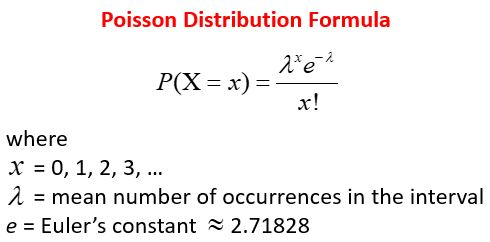

In [ ]:
arrivals = pd.read_pickle('Arrivals.pkl')
departures = pd.read_pickle('Departures.pkl')

In [ ]:
departures.head()

Start Station ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,42,...,781,782,783,784,785,786,787,788,789,790,792,793,794,795,796,797,798,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,826
Start Datetime Rounded,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.5,1.300000,1.00,1.25,1.411765,1.0,2.0,1.0,1.125000,1.800000,1.250000,1.571429,1.250000,1.500000,2.200000,1.600000,1.222222,1.750000,1.666667,3.0,1.000000,1.000000,1.000000,1.181818,1.181818,1.250000,1.166667,1.400000,1.0,1.125,1.100000,1.750000,1.680000,1.166667,1.454545,1.625000,1.0,2.631579,1.437500,1.111111,...,2.666667,1.333333,1.571429,1.933333,2.611111,3.0,4.333333,2.666667,3.000000,1.923077,1.900000,1.625,0.0,1.000000,1.000000,1.0,2.000000,1.909091,2.111111,1.25,1.50,1.277778,0.0,1.666667,1.666667,1.5,1.166667,2.000000,1.000000,1.666667,1.666667,1.375000,1.846154,1.333333,1.0,2.235294,2.466667,3.0,1.625000,1.352941
0.5,2.0,1.000000,1.75,1.50,1.333333,1.0,2.0,0.0,1.714286,1.222222,1.250000,1.142857,1.400000,1.368421,1.000000,1.000000,1.000000,1.857143,1.000000,1.6,1.428571,1.000000,1.200000,1.600000,1.000000,1.000000,1.000000,1.583333,3.0,1.000,1.166667,1.200000,1.450000,2.166667,1.272727,1.470588,1.0,2.323529,2.142857,1.500000,...,1.000000,3.000000,1.428571,2.333333,2.000000,1.0,2.250000,1.750000,1.666667,1.500000,1.428571,1.000,1.0,0.000000,1.500000,1.6,1.625000,2.250000,1.285714,1.50,1.50,1.111111,1.0,1.000000,1.000000,1.0,1.000000,1.750000,1.166667,1.400000,1.166667,1.428571,2.111111,1.500000,1.6,2.571429,2.000000,1.0,3.250000,1.375000
1.0,1.5,1.400000,1.00,1.50,1.444444,1.0,0.0,0.0,1.500000,1.777778,0.000000,2.833333,1.000000,1.812500,1.666667,2.666667,1.666667,1.625000,2.500000,3.0,1.200000,1.333333,1.000000,1.200000,1.000000,1.000000,1.250000,1.285714,1.5,1.200,1.500000,1.411765,1.307692,1.000000,1.400000,1.166667,0.0,2.657143,1.636364,1.750000,...,1.500000,1.400000,1.400000,2.428571,2.666667,8.0,1.333333,1.750000,1.666667,2.000000,1.000000,1.000,0.0,2.142857,1.000000,1.0,1.714286,1.200000,1.444444,1.00,1.50,1.222222,0.0,1.000000,1.750000,1.5,1.000000,3.333333,1.500000,1.800000,1.500000,1.333333,2.166667,1.000000,1.0,1.428571,2.300000,1.0,1.333333,1.300000
1.5,1.0,1.333333,1.25,1.50,1.250000,2.5,1.0,2.0,1.285714,1.000000,1.666667,1.000000,1.000000,1.166667,1.875000,2.000000,1.571429,1.428571,1.000000,1.0,1.500000,1.000000,0.000000,2.666667,1.400000,1.000000,1.000000,1.166667,2.5,1.000,1.333333,1.200000,1.384615,2.333333,1.400000,1.823529,0.0,2.733333,1.714286,1.000000,...,2.000000,1.000000,1.200000,2.000000,1.777778,0.0,2.000000,1.750000,0.000000,2.000000,1.250000,1.250,1.0,1.000000,1.666667,1.0,1.769231,2.333333,1.000000,2.00,1.75,1.700000,0.0,1.333333,1.000000,1.0,1.000000,1.000000,2.000000,1.000000,1.000000,1.142857,2.111111,0.000000,1.0,2.000000,3.000000,0.0,2.000000,1.500000
2.0,1.0,1.000000,1.50,1.00,1.000000,0.0,0.0,0.0,3.500000,2.000000,1.000000,1.500000,1.666667,1.000000,2.500000,1.000000,1.000000,2.400000,1.000000,0.0,1.500000,1.000000,1.333333,1.400000,1.200000,1.666667,1.333333,1.666667,1.0,1.600,1.111111,1.692308,1.200000,0.000000,1.857143,1.222222,1.0,3.038462,1.555556,1.000000,...,1.000000,1.000000,2.000000,0.000000,1.500000,0.0,1.000000,1.000000,3.500000,1.000000,1.333333,0.000,1.0,0.000000,1.000000,1.0,1.500000,2.666667,1.250000,1.00,1.25,1.000000,0.0,1.000000,1.500000,2.0,3.000000,2.666667,0.000000,0.000000,1.333333,2.250000,2.500000,1.000000,1.5,1.800000,2.500000,0.0,1.000000,2.666667


In [ ]:
capacity = df.groupby(['Start Station ID'])['Capacity'].max()

In [ ]:
dep_rate = departures.loc[8.5,:]
arr_rate = arrivals.loc[8.5,:]

In [ ]:
def station_sim(a, d, b, max_cap, min_cap):
  '''Estimates bad experiences expected '''
  bad_exp = 0 
  bikes = b

  sim_arrivals = np.random.poisson(a)
  sim_departures = np.random.poisson(d)

  A_List = []
  D_List = []

  for i in range(0, sim_arrivals):
    A_List.append('a')

  for i in range(0, sim_departures):
    D_List.append('d')

  A_List.extend(D_List)
  np.random.shuffle(A_List)

  for i in A_List:
    if i =='a':
      bikes += 1
      if bikes > max_cap:
        bad_exp += 1
        bikes -= 1
    if i == 'd':
      bikes -= 1
      if bikes < min_cap:
        bad_exp += 1
        bikes += 1 

  return bad_exp

In [ ]:
station_sim(5, 10, 5, 10, 0)

7

In [ ]:
function_df = pd.DataFrame({'a': arr_rate, 'd': dep_rate, 'c': capacity})

In [ ]:
function_df


,a,d,c
1,1.076923,3.718750,19.0
2,2.054054,1.600000,37.0
3,11.756098,7.085714,32.0
4,1.354839,3.677419,23.0
5,6.400000,2.631579,27.0
...,...,...,...
818,2.696970,2.000000,13.0
819,1.880000,2.900000,38.0
820,1.000000,4.000000,24.0
821,1.238095,1.966667,27.0


In [ ]:
for station in function_df.index[:5]:
  optimal_starting_bikes = 0
  fewest_bad_exp = 10000
  print(f'station: {station}')
  for i in range(int(function_df['c'][station])+1):
    sim_results = []
    for simulation in range(10000):
      result = station_sim(function_df['a'][station], function_df['d'][station], i, function_df['c'][station], 0)
      sim_results.append(result)
    columns = ['Sim_Results']
    Bad_Experiences_Expected = pd.DataFrame(columns=columns, data=sim_results)

    mean_bad_experiences = Bad_Experiences_Expected.mean()[0]
    if mean_bad_experiences < fewest_bad_exp:
      optimal_starting_bikes = i
      fewest_bad_exp = mean_bad_experiences

    print(f'The number of bad experiences expected with {i} starting bikes is: {mean_bad_experiences}')
  print(f'The optimal number of starting bikes is {optimal_starting_bikes}')





station: 1
The number of bad experiences expected with 0 starting bikes is: 2.9916
The number of bad experiences expected with 1 starting bikes is: 2.0571
The number of bad experiences expected with 2 starting bikes is: 1.3083
The number of bad experiences expected with 3 starting bikes is: 0.7605
The number of bad experiences expected with 4 starting bikes is: 0.4069
The number of bad experiences expected with 5 starting bikes is: 0.1962
The number of bad experiences expected with 6 starting bikes is: 0.0795
The number of bad experiences expected with 7 starting bikes is: 0.0322
The number of bad experiences expected with 8 starting bikes is: 0.0121
The number of bad experiences expected with 9 starting bikes is: 0.0039
The number of bad experiences expected with 10 starting bikes is: 0.002
The number of bad experiences expected with 11 starting bikes is: 0.0005
The number of bad experiences expected with 12 starting bikes is: 0.0
The number of bad experiences expected with 13 startin